# Importing the libraries

In [ ]:
#Import Packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import re
import sys,traceback
import seaborn as sns

# Uploading the dataset

In [ ]:
hr=pd.read_csv('/content/empattri.csv')

In [ ]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


In [ ]:
#Rename 'sales' column to department
hr=hr.rename(columns = {'sales':'department'})
#Display data type for each column
hr.dtypes

Age                          int64
Attrition                   object
BusinessTravel              object
DailyRate                    int64
Department                  object
DistanceFromHome             int64
Education                    int64
EducationField              object
EmployeeCount                int64
EmployeeNumber               int64
EnvironmentSatisfaction      int64
Gender                      object
HourlyRate                   int64
JobInvolvement               int64
JobLevel                     int64
JobRole                     object
JobSatisfaction              int64
MaritalStatus               object
MonthlyIncome                int64
MonthlyRate                  int64
NumCompaniesWorked           int64
Over18                      object
OverTime                    object
PercentSalaryHike            int64
PerformanceRating            int64
RelationshipSatisfaction     int64
StandardHours                int64
StockOptionLevel             int64
TotalWorkingYears   

In [ ]:
#Check for Missing Values
hr.isnull().any()

Age                         False
Attrition                   False
BusinessTravel              False
DailyRate                   False
Department                  False
DistanceFromHome            False
Education                   False
EducationField              False
EmployeeCount               False
EmployeeNumber              False
EnvironmentSatisfaction     False
Gender                      False
HourlyRate                  False
JobInvolvement              False
JobLevel                    False
JobRole                     False
JobSatisfaction             False
MaritalStatus               False
MonthlyIncome               False
MonthlyRate                 False
NumCompaniesWorked          False
Over18                      False
OverTime                    False
PercentSalaryHike           False
PerformanceRating           False
RelationshipSatisfaction    False
StandardHours               False
StockOptionLevel            False
TotalWorkingYears           False
TrainingTimesL

In [ ]:
#Dimensions of our dataset
hr.shape

(1470, 35)

In [ ]:
#Summary for each variable
hr.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,...,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,...,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,...,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [ ]:
#To get the unique values for department
hr['Department'].unique()

array(['Sales', 'Research & Development', 'Human Resources'], dtype=object)

In [ ]:
#Combine "technical","support" and "IT" into one department
hr['Department']=np.where(hr['Department'] =='support', 'technical', hr['Department'])
hr['Department']=np.where(hr['Department'] =='IT', 'technical', hr['Department'])

In [ ]:
#Print the updated values of departments
print(hr['Department'].unique())

['Sales' 'Research & Development' 'Human Resources']



# Data Exploration

Let us find out the number of employees who left the company and those who didn’t:

In [ ]:
hr['Attrition'].value_counts()

No     1233
Yes     237
Name: Attrition, dtype: int64

In [ ]:
hr.groupby('Attrition').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Attrition,,,,,,,,,,,,,,,,,,,,,
No,37.561233,812.504461,8.915653,2.927007,1.0,1027.656123,2.771290,65.952149,2.770479,2.145985,...,2.733982,80.0,0.845093,11.862936,2.832928,2.781022,7.369019,4.484185,2.234388,4.367397
Yes,33.607595,750.362869,10.632911,2.839662,1.0,1010.345992,2.464135,65.573840,2.518987,1.637131,...,2.599156,80.0,0.527426,8.244726,2.624473,2.658228,5.130802,2.902954,1.945148,2.852321


In [ ]:
hr.groupby('Department').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Department,,,,,,,,,,,,,,,,,,,,,
Human Resources,37.809524,751.539683,8.698413,2.968254,1.0,1205.269841,2.682540,64.301587,2.746032,2.031746,...,2.888889,80.0,0.777778,11.555556,2.555556,2.920635,7.238095,3.539683,1.777778,3.666667
Research & Development,37.042664,806.851197,9.144641,2.899063,1.0,1006.503642,2.744017,66.167534,2.741935,1.977107,...,2.708637,80.0,0.804370,11.342352,2.792924,2.725286,6.864724,4.155047,2.137357,4.084287
Sales,36.542601,800.275785,9.365471,2.934978,1.0,1038.946188,2.679372,65.520179,2.701794,2.255605,...,2.695067,80.0,0.773543,11.105381,2.847534,2.816143,7.284753,4.486547,2.354260,4.271300


In [ ]:
hr.groupby('MonthlyIncome').mean()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
MonthlyIncome,,,,,,,,,,,,,,,,,,,,,
1009,20.0,1362.0,10.0,1.0,1.0,701.0,4.0,32.0,3.0,1.0,...,4.0,80.0,0.0,1.0,5.0,3.0,1.0,0.0,1.0,1.0
1051,18.0,287.0,5.0,2.0,1.0,1012.0,2.0,73.0,3.0,1.0,...,4.0,80.0,0.0,0.0,2.0,3.0,0.0,0.0,0.0,0.0
1052,28.0,1144.0,10.0,1.0,1.0,1056.0,4.0,74.0,3.0,1.0,...,2.0,80.0,0.0,1.0,5.0,3.0,1.0,0.0,0.0,0.0
1081,30.0,945.0,9.0,3.0,1.0,1876.0,2.0,89.0,3.0,1.0,...,3.0,80.0,0.0,1.0,3.0,2.0,1.0,0.0,0.0,0.0
1091,29.0,746.0,24.0,3.0,1.0,1928.0,3.0,45.0,4.0,1.0,...,4.0,80.0,0.0,1.0,3.0,3.0,1.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19859,55.0,725.0,2.0,3.0,1.0,787.0,4.0,78.0,3.0,5.0,...,4.0,80.0,1.0,24.0,2.0,3.0,5.0,2.0,1.0,4.0
19926,50.0,1452.0,11.0,3.0,1.0,226.0,3.0,53.0,3.0,5.0,...,2.0,80.0,0.0,21.0,5.0,3.0,5.0,4.0,4.0,4.0
19943,56.0,718.0,4.0,4.0,1.0,1191.0,4.0,92.0,3.0,5.0,...,4.0,80.0,1.0,28.0,2.0,3.0,5.0,2.0,4.0,2.0


# Data Visualization

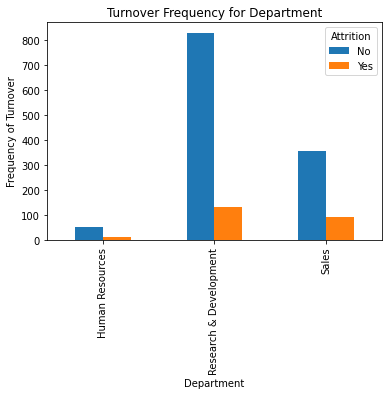

In [ ]:
%matplotlib inline

#Bar chart for department employee work for and the frequency of turnover
pd.crosstab(hr.Department,hr.Attrition).plot(kind='bar')
plt.title('Turnover Frequency for Department')
plt.xlabel('Department')
plt.ylabel('Frequency of Turnover')
plt.savefig('Department_bar_chart')

In [ ]:
#Proportion of employees left by department
pd.crosstab(hr.Department, hr.Attrition)

Attrition,No,Yes
Department,,
Human Resources,51,12
Research & Development,828,133
Sales,354,92


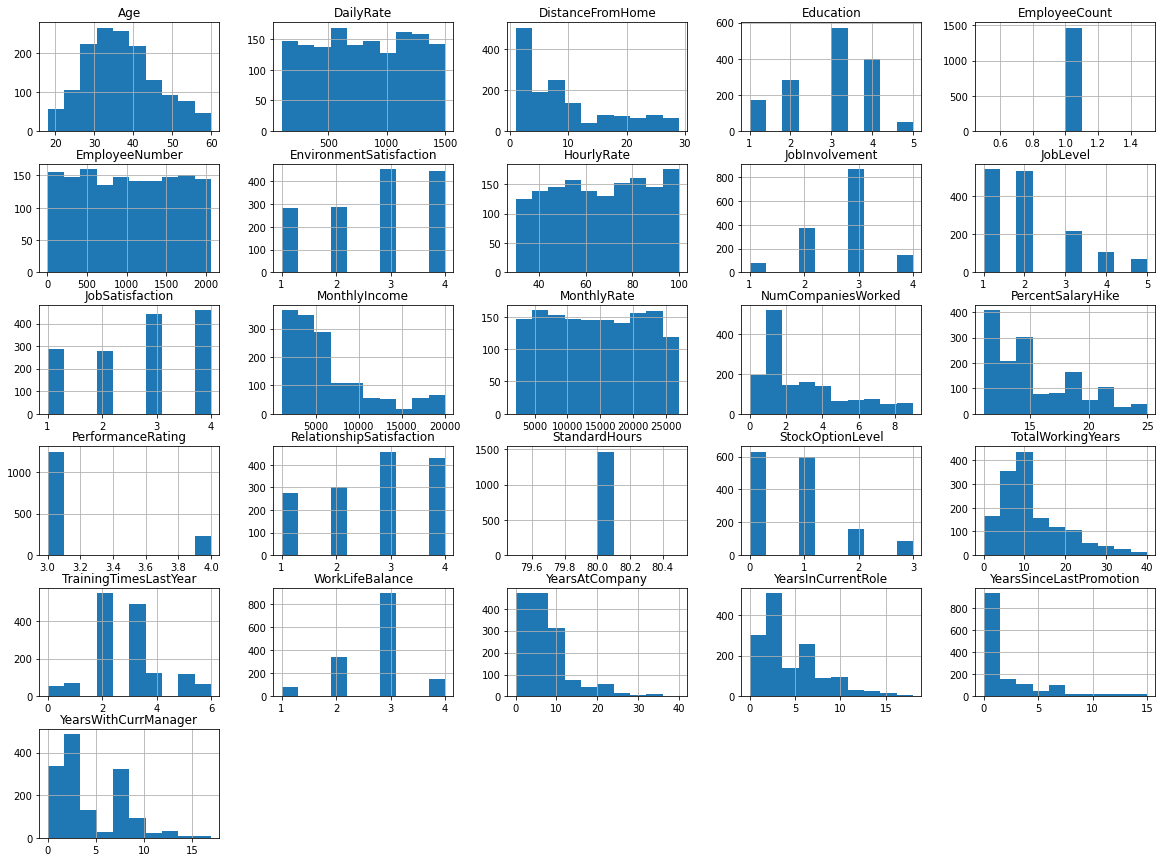

In [ ]:
#Histogram of numeric variables
num_bins = 10

hr.hist(bins=num_bins, figsize=(20,15))
plt.savefig("hr_histogram_plots")
plt.show()

# Correlation Matrix

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  This is separate from the ipykernel package so we can avoid doing imports until


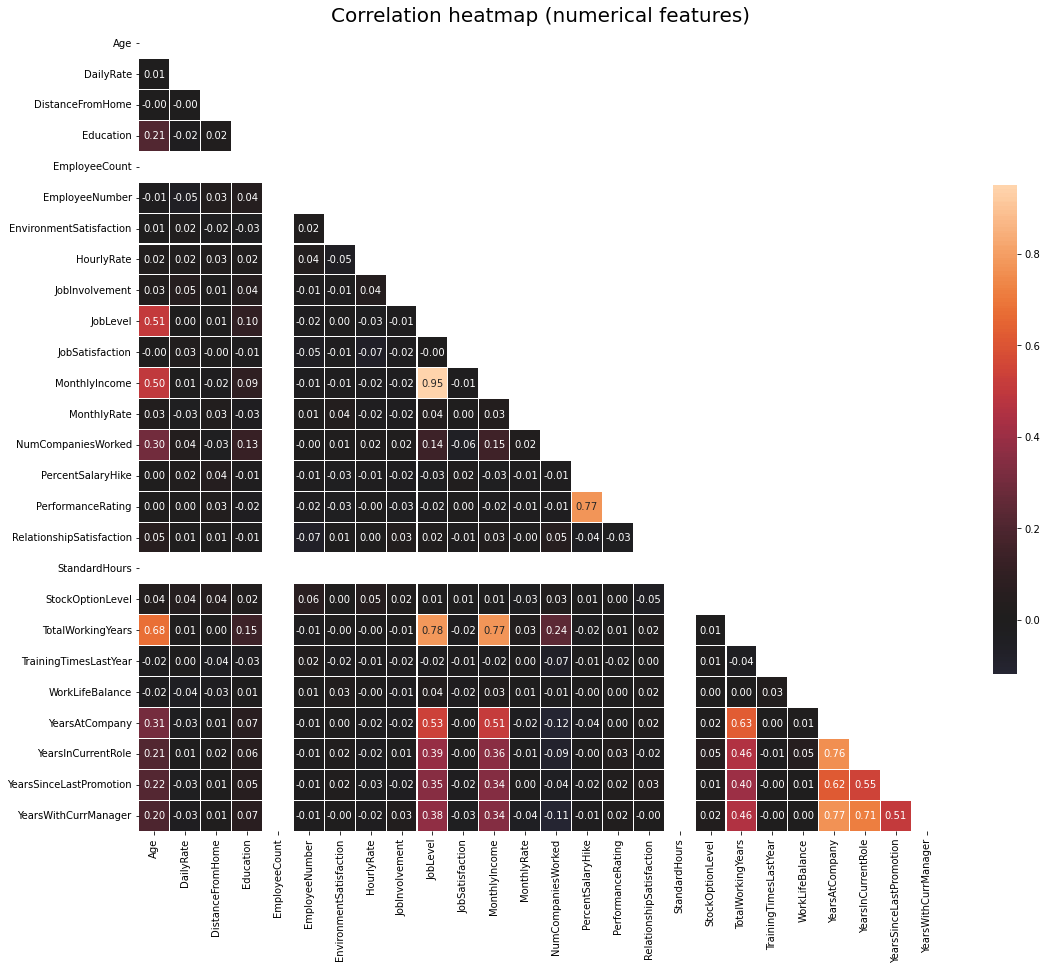

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
corr = hr.corr()
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True
sns.heatmap(corr, mask=mask, annot=True, linewidths=.1, fmt= '.2f',ax=ax,
            center=0, square=True, cbar_kws={'shrink': .5}
           )
plt.title('Correlation heatmap (numerical features)', size=20)
plt.show();

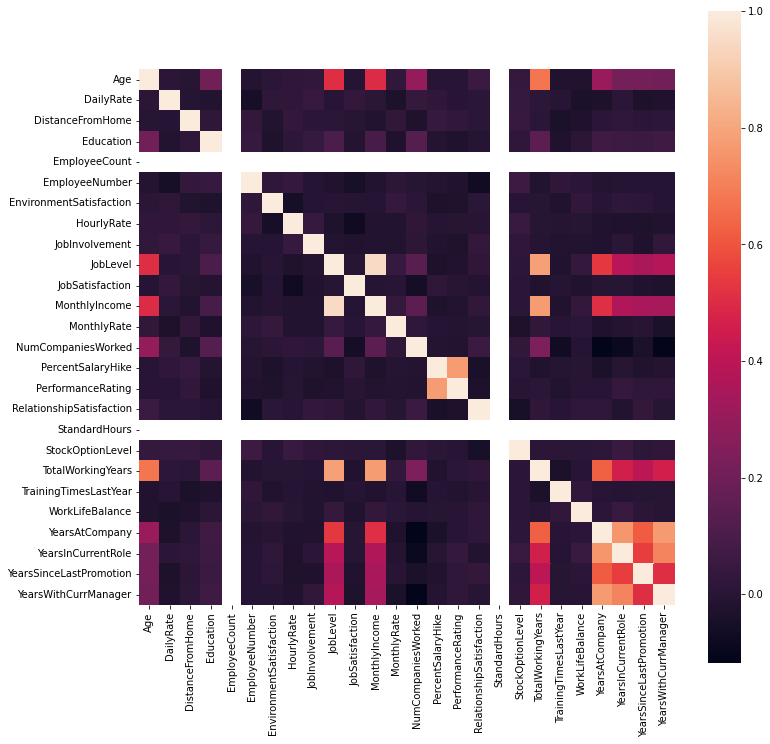

In [ ]:
# Creating the heatmap of correlation matrix
corr = hr.corr()
f, ax = plt.subplots(figsize=(12,12))
sns.heatmap(corr, square=True)
plt.show()

In [ ]:
corr # Printing the correlation matrix

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,NaN,-0.010145,0.010146,0.024287,0.029820,0.509604,...,0.053535,NaN,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,NaN,-0.050990,0.018355,0.023381,0.046135,0.002966,...,0.007846,NaN,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,NaN,0.032916,-0.016075,0.031131,0.008783,0.005303,...,0.006557,NaN,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,NaN,0.042070,-0.027128,0.016775,0.042438,0.101589,...,-0.009118,NaN,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EmployeeCount,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
EmployeeNumber,-0.010145,-0.050990,0.032916,0.042070,NaN,1.000000,0.017621,0.035179,-0.006888,-0.018519,...,-0.069861,NaN,0.062227,-0.014365,0.023603,0.010309,-0.011240,-0.008416,-0.009019,-0.009197
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,NaN,0.017621,1.000000,-0.049857,-0.008278,0.001212,...,0.007665,NaN,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,NaN,0.035179,-0.049857,1.000000,0.042861,-0.027853,...,0.001330,NaN,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,NaN,-0.006888,-0.008278,0.042861,1.000000,-0.012630,...,0.034297,NaN,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,NaN,-0.018519,0.001212,-0.027853,-0.012630,1.000000,...,0.021642,NaN,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281


In [ ]:
hr

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,...,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,...,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,...,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,...,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,...,4,80,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,No,Travel_Frequently,884,Research & Development,23,2,Medical,1,2061,...,3,80,1,17,3,3,5,2,0,3
1466,39,No,Travel_Rarely,613,Research & Development,6,1,Medical,1,2062,...,1,80,1,9,5,3,7,7,1,7
1467,27,No,Travel_Rarely,155,Research & Development,4,3,Life Sciences,1,2064,...,2,80,1,6,0,3,6,2,0,3
1468,49,No,Travel_Frequently,1023,Sales,2,3,Medical,1,2065,...,4,80,0,17,3,2,9,6,0,8


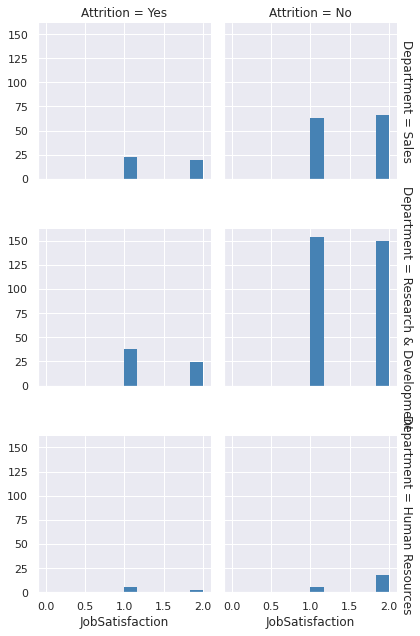

In [ ]:
sns.set(style="darkgrid")
g = sns.FacetGrid(hr, row="Department", col="Attrition", margin_titles=True)
bins = np.linspace(0, 2, 13)
g.map(plt.hist, "JobSatisfaction", color="steelblue", bins=bins, lw=0)

# Necessary Analysis

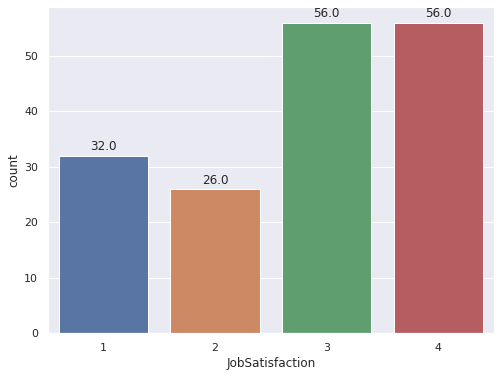

In [ ]:
b=hr.loc[(hr['Education'] == 1)]
plt.figure(figsize=(8, 6))
splot=sns.countplot(x='JobSatisfaction', data=b)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.1f'),
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha = 'center', va = 'center',
                xytext = (0, 9),
                textcoords = 'offset points')

Here we can see most of the employees are highly satisfied with their jobs

In [ ]:
sub=hr.loc[(hr['Age'] > 50) & (hr['Age']<60) & (hr['Department']=='Sales') & (hr['Gender']=='Female')]
sub['EmployeeCount'].sum()

16

There are 16 female employees from Department(Sales) that are between the Age of 50-60.

Male      882
Female    588
Name: Gender, dtype: int64


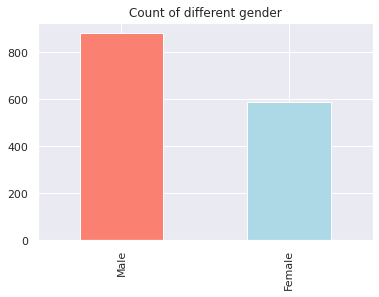

In [ ]:
gender_dict = hr["Gender"].value_counts()
print(gender_dict)
hr['Gender'].value_counts().plot(kind='bar',color=['salmon','lightblue'],title="Count of different gender")

In the given dataset ,it is clear from the plot that there are 882 Males and 588 Females.

Travel_Rarely        1043
Travel_Frequently     277
Non-Travel            150
Name: BusinessTravel, dtype: int64


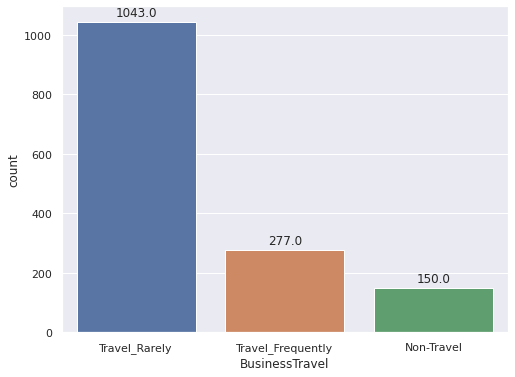

In [ ]:
busi_travel=hr["BusinessTravel"].value_counts()
print(busi_travel)
plt.figure(figsize=(8, 6))
plot=sns.countplot(x='BusinessTravel', data=hr)
for p in plot.patches:
    plot.annotate(format(p.get_height(), '.1f'),
                   (p.get_x() + p.get_width() / 2., p.get_height()),
                   ha = 'center', va = 'center',
                   xytext = (0, 9),
                   textcoords = 'offset points')

Here we can see , the count of employees who Travel_Rarely are 1043,Travel_frequently are 277 and for Non_travel employees are 150.

# Importing various Models and  important Libraries

In [ ]:
from sklearn import preprocessing
from sklearn.impute import SimpleImputer

from sklearn.compose import ColumnTransformer

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV, cross_val_score, StratifiedKFold

from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import confusion_matrix

import matplotlib.pyplot as plt
import seaborn as sns
from imblearn.over_sampling import SMOTE
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


import warnings
warnings.filterwarnings('ignore')

# THE THREE MODELS ARE AS FOLLOWS :

# Logistic Regression Model

Logistic regression is a statistical method used to predict the outcome of a dependent variable based on previous observations. It's a type of regression analysis and is a commonly used algorithm for solving binary classification problems.

In [ ]:
#Importing the required modules
from sklearn.datasets import make_classification
from matplotlib import pyplot as plt
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
import pandas as pd

We have importorted the following modules:

make_classification: available in sklearn.datasets and used to generate dataset

matplotlib.pyplot: for plotting

LogisticRegression: this is imported from sklearn.linear_model. Used for performing logistic regression

train_test_split:  imported from sklearn.model_selection and used to split dataset into training and test datasets

confusion matrix: imported from sklearn.metrics and used to generate the confusion matrix of the classifiers

Pandas for managing datasets.

In [ ]:
# Generate and dataset for Logistic Regression
x, y = make_classification(
    n_samples=100,
    n_features=1,
    n_classes=2,
    n_clusters_per_class=1,
    flip_y=0.03,
    n_informative=1,
    n_redundant=0,
    n_repeated=0
)

** Visualize the Data**


Now we would create a simple scatter plot just to see how the data looks like. The code and the output is given above.

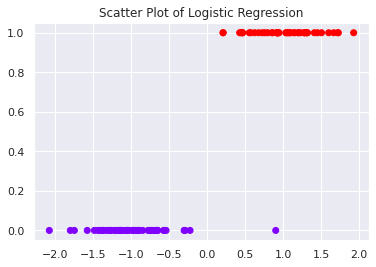

In [ ]:
# Create a scatter plot
plt.scatter(x, y, c=y, cmap='rainbow')
plt.title('Scatter Plot of Logistic Regression')
plt.show()


In [ ]:
# Split the dataset into training and test dataset
x_train, x_test, y_train, y_test = train_test_split(x, y, random_state=1)


In [ ]:
x_train.shape

(75, 1)

**Perform Logistic Regression**


Here we would create a LogistiRegression object and fit it with out dataset.

In [ ]:
# Create a Logistic Regression Object, perform Logistic Regression
log_reg = LogisticRegression()
log_reg.fit(x_train, y_train)

LogisticRegression()

The logistic regression output is given below:

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [ ]:
# Show to Coeficient and Intercept
print(log_reg.coef_)
print(log_reg.intercept_)

[[2.95093812]]
[-0.23796215]



**Make prediction using the model**

We now use the model to predict the outputs given the test dataset.

In [ ]:
# Perform prediction using the test dataset
y_pred = log_reg.predict(x_test)

In [ ]:
print(y_pred)

[1 1 0 1 0 1 1 0 1 1 1 1 0 0 1 1 0 1 0 0 1 1 0 0 0]


In [ ]:
print(x.shape)

(100, 1)


In [ ]:
print(y.shape)

(100,)


**Display the Confusion Matrix**


The confusion matrix helps you to see how the model performed. It tells you the number of True positives, true negatives, false positives and false negatives

In [ ]:
# Show the Confusion Matrix
confusion_matrix(y_test, y_pred)

array([[11,  0],
       [ 0, 14]])

**Calculating f1 score**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.92      1.00      0.96        11

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



# Random Forest Classifier


Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

**Importing required modules**

In [ ]:
# Instantiate and fit the RandomForestClassifier
forest = RandomForestClassifier()
forest.fit(x_train, y_train)

RandomForestClassifier()

In [ ]:
# Make predictions for the test set
y_pred_test = forest.predict(x_test)
print(y_pred_test)

[1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]


** Accuracy score**

In [ ]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

0.84

**Display the Confusion Matrix**


The confusion matrix helps you to see how the model performed. It tells you the number of True positives, true negatives, false positives and false negatives

In [ ]:
# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)

array([[13,  1],
       [ 3,  8]])

**Calculating f1 score**

In [ ]:
print(classification_report(y_test,y_pred_test))

              precision    recall  f1-score   support

           0       0.81      0.93      0.87        14
           1       0.89      0.73      0.80        11

    accuracy                           0.84        25
   macro avg       0.85      0.83      0.83        25
weighted avg       0.85      0.84      0.84        25



# K-Nearest Neighbour Model


The abbreviation KNN stands for “K-Nearest Neighbour”. It is a supervised machine learning algorithm. The algorithm can be used to solve both classification and regression problem statements. The number of nearest neighbours to a new unknown variable that has to be predicted or classified is denoted by the symbol 'K'

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [ ]:
knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
knn.fit(x_train, y_train)


KNeighborsClassifier(metric='euclidean')

In [ ]:
y_pred = knn.predict(x_test)
print(y_pred)

[1 1 1 1 1 1 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 1]


**Calculating Accuracy Score**

In [ ]:
# View accuracy score
accuracy_score(y_test, y_pred)

0.96

**Display the Confusion Matrix**

In [ ]:
confusion_matrix(y_test, y_pred)

array([[13,  1],
       [ 0, 11]])

**Calculating f1 Score**

In [ ]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      0.93      0.96        14
           1       0.92      1.00      0.96        11

    accuracy                           0.96        25
   macro avg       0.96      0.96      0.96        25
weighted avg       0.96      0.96      0.96        25



# ROC Curve of Logistic Regression and Random Forest Classifier

ROC (Receiver Operating Characterstic  curve ) is a  useful tool when predicting the probability of a binary outcome .


In general, it  is for many different levels of thresholds and thus it has many F score values. F1 score is applicable for any particular point on the ROC curve.




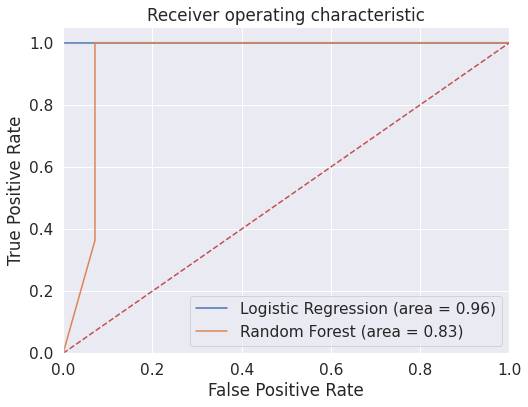

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

#ROC for logistic regression
logit_roc_auc = roc_auc_score(y_test, log_reg.predict(x_test))
fpr, tpr, thresholds = roc_curve(y_test, log_reg.predict_proba(x_test)[:,1])

#ROC for Random Forrest
rf_roc_auc = roc_auc_score(y_test, forest.predict(x_test))
rf_fpr, rf_tpr, rf_thresholds = roc_curve(y_test, forest.predict_proba(x_test)[:,1])

#ROC Curve for Random Forest & Logistic Regression
#plt.figure()
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot(rf_fpr, rf_tpr, label='Random Forest (area = %0.2f)' % rf_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('ROC')
plt.show()



# Q4 -Why we have chosen these models ?

**Random Forest Classifier**

Random Forest is the best classfier for predicting employee attrition for our dataset. Some of the most important factors on which employee attrition depends are:
Satisfaction Level,Tenure with organisation,Time since last evaluation,Work Accident,Salary,Department,Career Advancement ( If Promoted in last five years or not).

Random forest is a Supervised Machine Learning Algorithm that is used widely in Classification and Regression problems. It builds decision trees on different samples and takes their majority vote for classification and average in case of regression.

WHY WE HAVE CHOSEN THIS?

Because it provides higher accuracy through cross validation. Random forest classifier will handle the missing values and maintain the accuracy of a large proportion of data. If there are more trees, it won't allow over-fitting trees in the model.

**Logistic Regression**:

Logistic Regression is one of the fundamental models used in Machine Learning. It is a classification technique and is best suited for predicting the categorical response variable.

WHY WE HAVE CHOSEN THIS MODEL?

 Because it is simple to understand, easy to implement, and efficient to train.It performs well when the dataset is linearly separable.
It shows good accuracy for smaller datasets.

It doesn't make any assumptions about the distribution of classes.
It offers the direction of association (positive or negative) and it is also useful to find relationships between features and provides well-calibrated probabilities. It is less prone to overfitting in low dimensional datasets.

**KNN** : K Nearest Neighbor is one of the fundamental algorithms in machine learning. Machine learning models use a set of input values to predict output values. KNN is one of the simplest forms of machine learning algorithms mostly used for classification. It classifies the data point on how its neighbor is classified.

KNN classifies the new data points based on the similarity measure of the earlier stored data points.

WHY WE HAVE CHOSEN THIS MODEL?
 Since the KNN algorithm requires no training before making predictions, new data can be added seamlessly which will not impact the accuracy of the algorithm.

And it is  very easy to implement. There are only two parameters required to implement KNN i.e. the value of K and the distance function.



# Q5
# Now, from one block of code, we will check the **accuracy** of all the models.

In [ ]:
for a,b in zip([log_reg,knn,forest],["Logistic Regression","KNN","Random Forest"]):
    a.fit(x_train,y_train)
    prediction=a.predict(x_train)
    y_pred=a.predict(x_test)
    score1=accuracy_score(y_train,prediction)
    score=accuracy_score(y_test,y_pred)
    msg1="[%s] training data accuracy is : %f" % (b,score1)
    msg2="[%s] test data accuracy is : %f" % (b,score)
    print(msg1)
    print(msg2)

[Logistic Regression] training data accuracy is : 0.933333
[Logistic Regression] test data accuracy is : 0.960000
[KNN] training data accuracy is : 0.933333
[KNN] test data accuracy is : 0.960000
[Random Forest] training data accuracy is : 1.000000
[Random Forest] test data accuracy is : 0.840000


# Model Scores (accuracy)

In [ ]:
model_scores={'Logistic Regression':log_reg.score(x_test,y_test),
             'KNN':knn.score(x_test,y_test),
             'Random forest':forest.score(x_test,y_test)

             }
model_scores

{'KNN': 0.96, 'Logistic Regression': 0.96, 'Random forest': 0.84}

Here, we can see that Logistic regression and KNN have the best accuracy.

# Model Comparison based on ACCURACY

In [ ]:
model_compare=pd.DataFrame(model_scores,index=['accuracy'])
model_compare

,Logistic Regression,KNN,Random forest
accuracy,0.96,0.96,0.84


# Visualize the accuracy of each model

<Figure size 576x432 with 0 Axes>

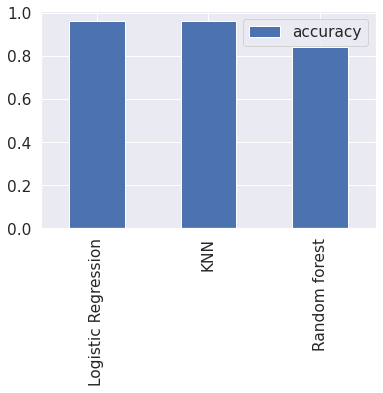

In [ ]:
plt.figure(figsize=(8, 6))
model_compare.T.plot(kind='bar') # (T is here for transpose)